In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
# Cargar el dataset
dataset_path = r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv"
df = pd.read_csv(dataset_path)

In [11]:
# Paso 1: Análisis exploratorio de datos (EDA)
df.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
print("\nDescripción estadística:")
print(df.describe())


Descripción estadística:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


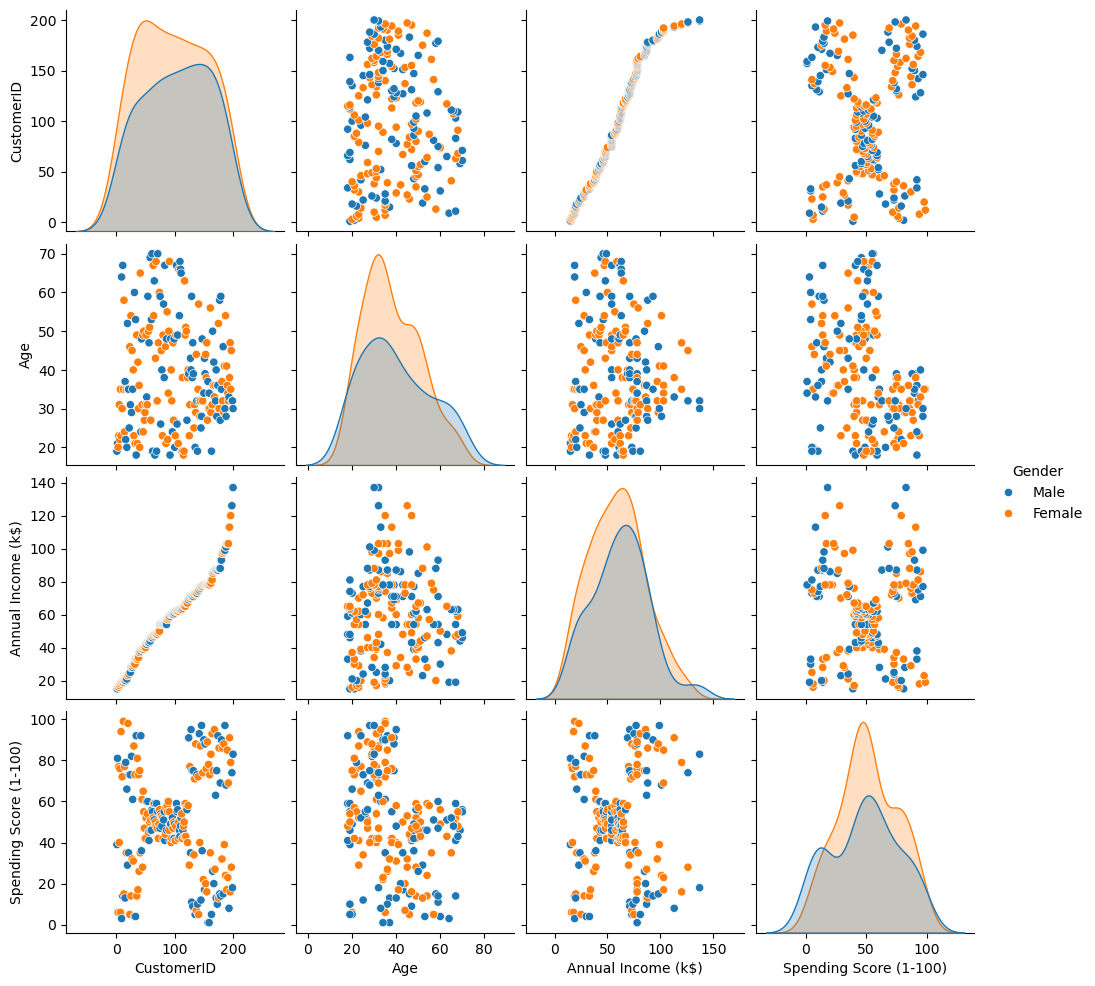

In [15]:
# Visualización de la distribución de variables
sns.pairplot(df, hue="Gender", diag_kind="kde")
plt.show()

In [17]:
# Comprobar valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [19]:
# Paso 2: Preprocesamiento de datos
# Convertir la columna "Gender" en valores numéricos
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [21]:
# Normalizar las variables numéricas
scaler = StandardScaler()
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [23]:
# Paso 3: Selección de características
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

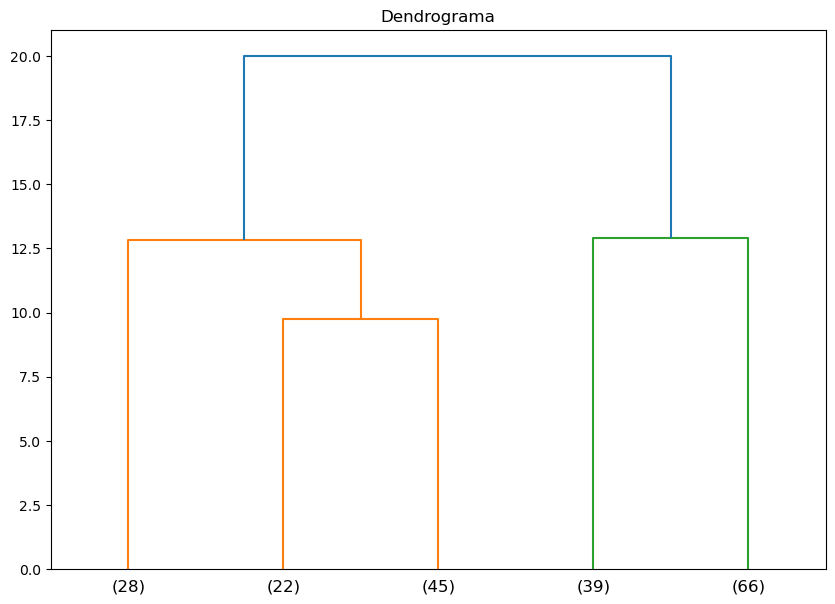

In [25]:
# Paso 4: Entrenar el modelo (Clustering Jerárquico)
# Crear un dendrograma
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=5)
plt.title("Dendrograma")
plt.show()

In [39]:
# Entrenar el modelo de clustering jerárquico
optimal_k = 5  # Número de clusters según el dendrograma
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X)

In [41]:
# Paso 5: Evaluación del modelo
silhouette_avg = silhouette_score(X, hierarchical_labels)
calinski_harabasz = calinski_harabasz_score(X, hierarchical_labels)
print(f"Clustering Jerárquico - Coeficiente de Silhouette: {silhouette_avg}")
print(f"Clustering Jerárquico - Índice de Calinski-Harabasz: {calinski_harabasz}")

Clustering Jerárquico - Coeficiente de Silhouette: 0.39002826186267214
Clustering Jerárquico - Índice de Calinski-Harabasz: 107.82656032570374


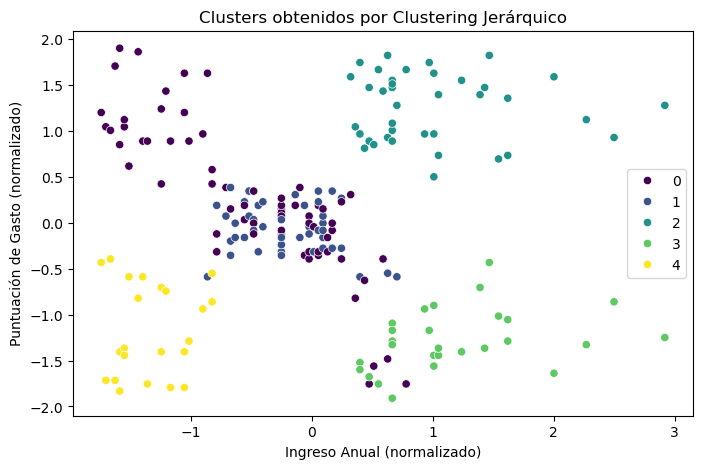

In [43]:
# Paso 6: Visualización de los resultados
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=hierarchical_labels, palette='viridis')
plt.title("Clusters obtenidos por Clustering Jerárquico")
plt.xlabel("Ingreso Anual (normalizado)")
plt.ylabel("Puntuación de Gasto (normalizado)")
plt.show()

In [33]:
# Paso 7: Interpretación
print("Interpretación: Los clusters jerárquicos reflejan agrupaciones más naturales basadas en la distancia entre clientes.")

Interpretación: Los clusters jerárquicos reflejan agrupaciones más naturales basadas en la distancia entre clientes.
